In [1]:
from models import Dim
from datasets import coil2000
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from tqdm import tqdm

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Artificial Dataset - Single Label

In [2]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(1000, n_features=300, centers=20,
                  cluster_std=2, random_state=34)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.apply_dim(num_dim=3)

('3Dim', 'LLE', 'k=30-reg=0.001'): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]


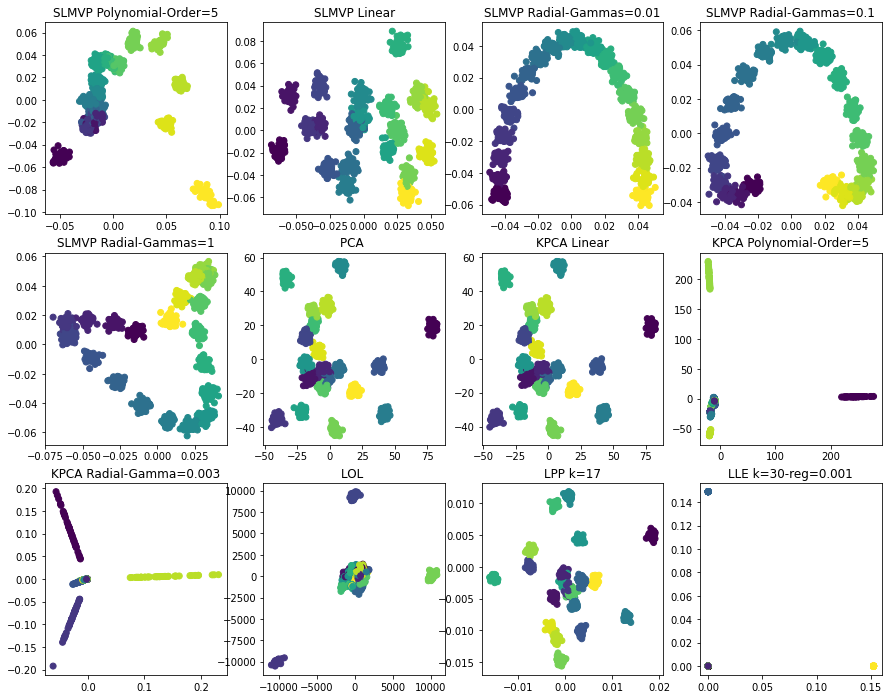

In [4]:
dim.plot_artificial(n_rows=3, n_cols=4, save_name=None)

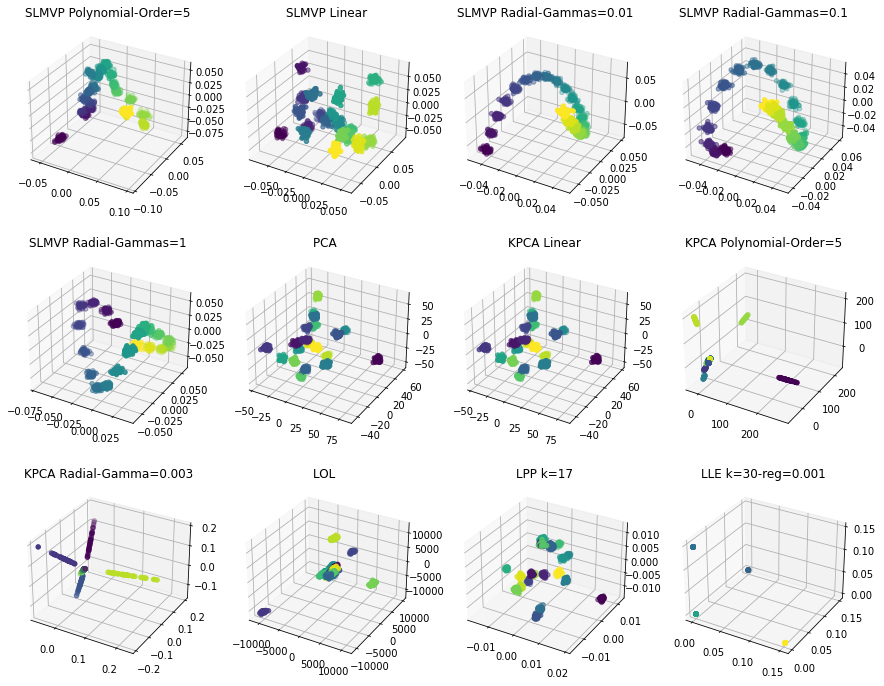

In [3]:
dim.plot_artificial_3D(n_rows=3, n_cols=4, save_name=None)

## Artificial Dataset - Multilabel

In [5]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

X, y = make_multilabel_classification(150, n_features=300, n_classes=2, random_state=34)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=33)

dim = Dim()
dim.X_train = X_train
dim.y_train = y_train
dim.X_test = X_test
dim.y_test = y_test

dim.apply_dim(num_dim=2, multilabel=True)

('2Dim', 'LLE', 'k=6-reg=0.001'): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]


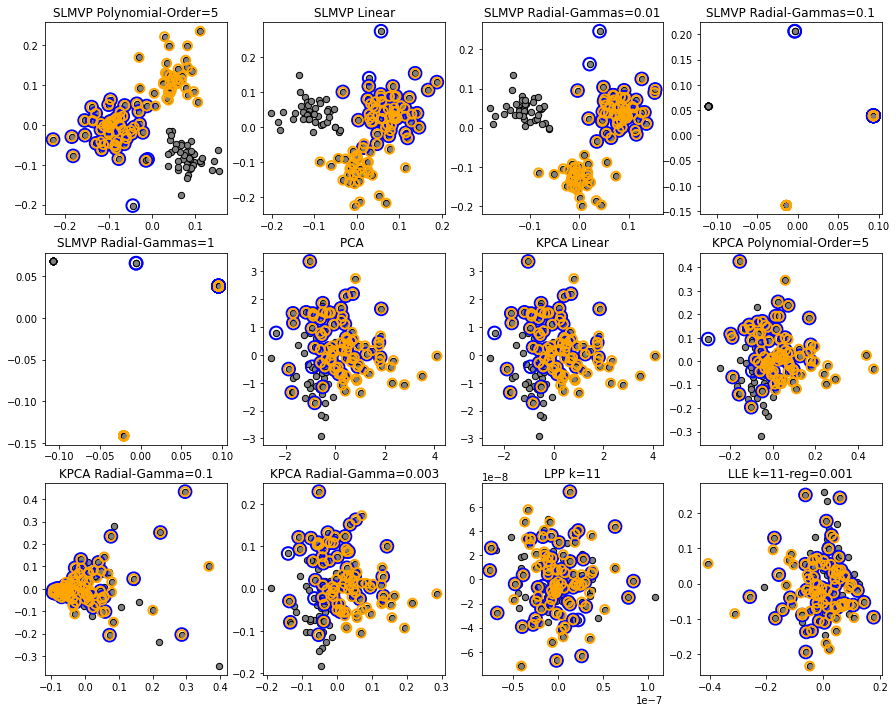

In [3]:
dim.plot_artificial_multilabel(n_rows=3, n_cols=4)

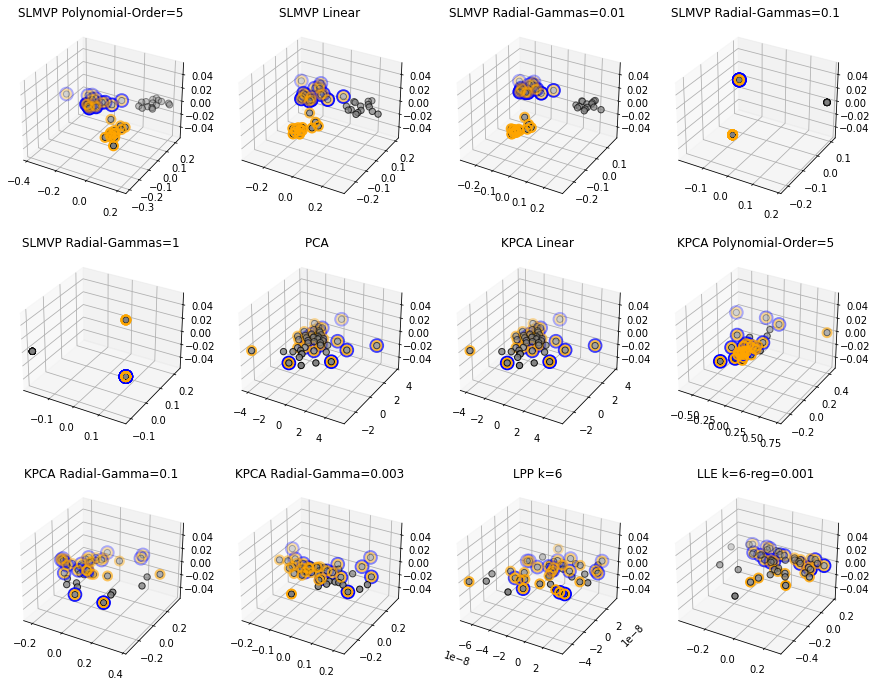

In [6]:
dim.plot_artificial_multilabel_3D(n_rows=3, n_cols=4, save_name=None)

## Variation and Betas

In [3]:
dim.get_weights()

7Dim                                                      \
               SLMVP                                                       
  Polynomial-Order=5                                              Linear   
                 Var     Var %        Beta    Beta %       R^2       Var   
0           0.001111  0.142857  147.019048  0.507264  0.930333  0.001111   
1           0.001111  0.142857   61.907581  0.213602  0.930333  0.001111   
2           0.001111  0.142857   38.200016  0.131803  0.930333  0.001111   
3           0.001111  0.142857    3.690924  0.012735  0.930333  0.001111   
4           0.001111  0.142857   21.096801  0.072791  0.930333  0.001111   
5           0.001111  0.142857   11.577731  0.039947  0.930333  0.001111   
6           0.001111  0.142857    6.335232  0.021859  0.930333  0.001111   

                                                                          \
                                                                           
                                            Radial-Gammas=0.01             
      Var %        Beta    Beta %       R^2                Var     Var %   
0  0.142857  166.695123  0.769985  0.958506           0.001111  0.142857   
1  0.142857   16.837614  0.077775  0.958506           0.001111  0.142857   
2  0.142857   10.159212  0.046927  0.958506           0.001111  0.142857   
3  0.142857    5.652209  0.026108  0.958506           0.001111  0.142857   
4  0.142857    5.309026  0.024523  0.958506           0.001111  0.142857   
5  0.142857    0.042899  0.000198  0.958506           0.001111  0.142857   
6  0.142857   11.795443  0.054485  0.958506           0.001111  0.142857   

                                                                           \
                                                                            
                                  Radial-Gammas=0.1                         
         Beta    Beta %       R^2               Var     Var %        Beta   
0  168.789172  0.828593  0.994961          0.001111  0.142857  154.256435   
1    0.181262  0.000890  0.994961          0.001111  0.142857    0.314625   
2   30.814940  0.151272  0.994961          0.001111  0.142857   64.314095   
3    0.051626  0.000253  0.994961          0.001111  0.142857    0.348769   
4    3.595573  0.017651  0.994961          0.001111  0.142857   34.811463   
5    0.004565  0.000022  0.994961          0.001111  0.142857    0.294905   
6    0.268598  0.001319  0.994961          0.001111  0.142857   16.091723   

                                                                       \
                                                                        
                      Radial-Gammas=1                                   
     Beta %       R^2             Var     Var %        Beta    Beta %   
0  0.570407  0.993274        0.001111  0.142857  132.367539  0.373824   
1  0.001163  0.993274        0.001111  0.142857   56.904944  0.160707   
2  0.237820  0.993274        0.001111  0.142857   44.476721  0.125608   
3  0.001290  0.993274        0.001111  0.142857   12.054281  0.034043   
4  0.128725  0.993274        0.001111  0.142857   60.287279  0.170259   
5  0.001090  0.993274        0.001111  0.142857    5.058543  0.014286   
6  0.059504  0.993274        0.001111  0.142857   42.941403  0.121272   

                                                                 \
                    PCA                                           
                                                                  
        R^2         Var     Var %      Beta    Beta %       R^2   
0  0.958968  757.932852  0.166512  0.041085  0.136693  0.411798   
1  0.958968  713.853856  0.156828  0.023833  0.079294  0.411798   
2  0.958968  692.290630  0.152091  0.018494  0.061530  0.411798   
3  0.958968  648.665370  0.142507  0.100458  0.334234  0.411798   
4  0.958968  606.441210  0.133231  0.089564  0.297990  0.411798   
5  0.958968  580.817414  0.127601  0.014958  0.049767  0.411798   
6  0.958968  551.814

## Comparing Techniques

In [9]:
data = coil2000()
dim = Dim(data.train, data.test, data.col_names)
dim.apply_dim(num_dim=5)
df = dim.get_corr_table(1)
df.corr(method='spearman').style.background_gradient(cmap='coolwarm')

100%|██████████| 12/12 [00:00<00:00, 353.86it/s]


## Classifiers

In [12]:
dim.apply_clf('KNN')

KNN: 100%|██████████| 12/12 [00:21<00:00,  1.82s/it]


,Best Score,Params,Dimensions,Dim. Technique,Dim. Params
0,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Polynomial-Order=5
1,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Linear
2,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Radial-Gammas=0.01
3,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Radial-Gammas=0.1
4,1.00,{'knn__n_neighbors': 3},7Dim,SLMVP,Radial-Gammas=1
5,1.00,{'knn__n_neighbors': 3},7Dim,PCA,
6,1.00,{'knn__n_neighbors': 3},7Dim,KPCA,Polynomial-Order=5
9,1.00,{'knn__n_neighbors': 3},7Dim,LOL,
10,1.00,{'knn__n_neighbors': 3},7Dim,LPP,k=17
11,1.00,{'knn__n_neighbors': 3},7Dim,LLE,k=30-reg=0.001


In [13]:
dim.apply_clf('Linear Regression')

Linear Reg.: 100%|██████████| 12/12 [00:00<00:00, 37.99it/s]


,Best Score,Params,Dimensions,Dim. Technique,Dim. Params
9,0.992841,,7Dim,LOL,
2,0.990829,,7Dim,SLMVP,Radial-Gammas=0.01
3,0.989562,,7Dim,SLMVP,Radial-Gammas=0.1
1,0.958516,,7Dim,SLMVP,Linear
4,0.956879,,7Dim,SLMVP,Radial-Gammas=1
0,0.927235,,7Dim,SLMVP,Polynomial-Order=5
10,0.377318,,7Dim,LPP,k=17
5,0.304909,,7Dim,PCA,
6,0.273830,,7Dim,KPCA,Polynomial-Order=5
11,0.267361,,7Dim,LLE,k=30-reg=0.001


In [ ]:
dim.apply_clf('XGBoost')

# Other

In [11]:
import pandas as pd

df = pd.DataFrame.from_dict(dim.scores, orient='index', columns=['Best Score', 'Params']).reset_index()
df[['Model', 'Dimensions', 'Dim. Technique', 'Dim. Params']] = df["index"].str.split("-", n = 3, expand = True)
df

,index,Best Score,Params,Model,Dimensions,Dim. Technique,Dim. Params
0,XGBoost-1Dim-SLMVP-Polynomial-Order=5,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Polynomial-Order=5
1,XGBoost-1Dim-SLMVP-Linear,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Linear
2,XGBoost-1Dim-SLMVP-Radial-Gammas=0.01,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=0.01
3,XGBoost-1Dim-SLMVP-Radial-Gammas=0.1,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=0.1
4,XGBoost-1Dim-SLMVP-Radial-Gammas=1,0.930472,{'xgb__n_estimators': 5},XGBoost,1Dim,SLMVP,Radial-Gammas=1
...,...,...,...,...,...,...,...
60,XGBoost-50Dim-KPCA-Polynomial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,KPCA,Polynomial
61,XGBoost-50Dim-KPCA-Radial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,KPCA,Radial
62,XGBoost-50Dim-LOL,0.927039,{'xgb__n_estimators': 10},XGBoost,50Dim,LOL,None
63,XGBoost-50Dim-LPP-k=68,0.926180,{'xgb__n_estimators': 10},XGBoost,50Dim,LPP,k=68


In [13]:
df.sort_values('Best Score').groupby('Dim. Technique', as_index=False).first()

,Dim. Technique,index,Best Score,Params,Model,Dimensions,Dim. Params
0,KPCA,XGBoost-50Dim-KPCA-Radial,0.927039,{'xgb__n_estimators': 5},XGBoost,50Dim,Radial
1,LLE,XGBoost-50Dim-LLE-k=68-reg=0.001,0.928755,{'xgb__n_estimators': 10},XGBoost,50Dim,k=68-reg=0.001
2,LOL,XGBoost-50Dim-LOL,0.927039,{'xgb__n_estimators': 10},XGBoost,50Dim,None
3,LPP,XGBoost-50Dim-LPP-k=68,0.926180,{'xgb__n_estimators': 10},XGBoost,50Dim,k=68
4,PCA,XGBoost-10Dim-PCA,0.928755,{'xgb__n_estimators': 10},XGBoost,10Dim,None
5,SLMVP,XGBoost-10Dim-SLMVP-Radial-Gammas=0.1,0.924464,{'xgb__n_estimators': 10},XGBoost,10Dim,Radial-Gammas=0.1


In [20]:
best_performing = df[df.Dimensions == '1Dim'].sort_values('Best Score')\
    .groupby('Dim. Technique', as_index=False)\
    .first()['index'].to_list()
best_performing = [x[8:] for x in best_performing]

best_performing

['1Dim-KPCA-Linear',
 '1Dim-LLE-k=68-reg=0.001',
 '1Dim-LOL',
 '1Dim-LPP-k=68',
 '1Dim-PCA',
 '1Dim-SLMVP-Polynomial-Order=5']

In [22]:
dim.get_corr_table()[best_performing].to_csv('corr_1dim')

In [9]:
df.groupby(['Dim. Technique']).max('Best Score')

,Best Score
Dim. Technique,
KPCA,0.931330
LLE,0.930472
LOL,0.930472
LPP,0.930472
PCA,0.930472
SLMVP,0.931330
